<a href="https://colab.research.google.com/github/Arminhosseini/Linear_boston/blob/master/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
dataset = load_boston()

In [ ]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
data['target'] = dataset.target

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
profile = ProfileReport(data)

In [ ]:
profile.to_file('boston.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data = data.sample(frac=1)

In [ ]:
train, test = train_test_split(data, test_size=.2)

In [ ]:
xtrain = train.LSTAT.values.reshape(-1, 1)
ytrain = train.target
xtest = test.LSTAT.values.reshape(-1, 1)
ytest = test.target

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_, lr.intercept_

(array([-0.93204237]), 34.4025679729247)

In [ ]:
yhat_train = lr.predict(xtrain)
yhat_test = lr.predict(xtest)
yhat = lr.predict(data.LSTAT.values.reshape(-1 ,1))

In [ ]:
yhat.shape, yhat_test.shape, yhat_train.shape

((506,), (102,), (404,))

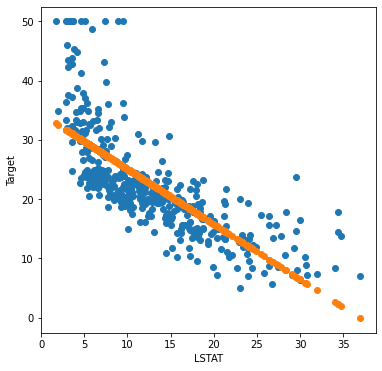

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Target')
ax.scatter(xtrain, ytrain)
ax.scatter(xtrain, yhat_train)

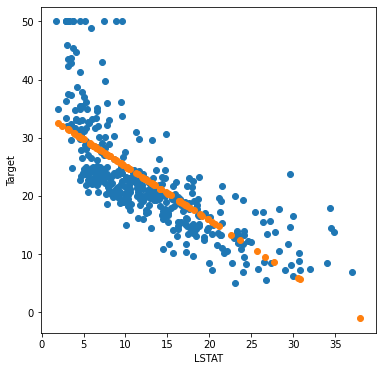

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Target')
ax.scatter(xtrain, ytrain)
ax.scatter(xtest, yhat_test)

In [ ]:
np.sqrt(mean_squared_error(ytrain, yhat_train))

6.071940039778479

In [ ]:
np.sqrt(mean_squared_error(ytest, yhat_test))

6.707357830553723

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
mean_absolute_error(ytrain, yhat_train), mean_absolute_error(ytest, yhat_test)

(4.39821678158616, 4.995523151346125)

In [ ]:
r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test)

(0.5498933083119588, 0.5230594509242923)

# multivariate

In [ ]:
cols = ['LSTAT', 'RM']

xtrain = train[cols]
xtest = test[cols]

In [ ]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
yhat_train = lr.predict(xtrain)
yhat_test = lr.predict(xtest)

In [ ]:
lr.score(xtest, ytest)

0.6703427871818863

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
xtrain = scalar.fit_transform(xtrain)

In [ ]:
xtest = scalar.transform(xtest)

In [ ]:
xtrain.mean(axis=0), xtest.mean(axis=0)

(array([-1.75876915e-16, -3.07784601e-16]), array([-0.08542165,  0.05921646]))

In [ ]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(xtest, ytest)

0.6703427871818861

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

In [ ]:
lr = LinearRegression()

In [ ]:
scores = cross_val_score(lr, xtrain, ytrain)

In [ ]:
scores, scores.mean()

(array([0.54925772, 0.74755163, 0.50240189, 0.67332297, 0.56923327]),
 0.6083534961277056)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge(alpha=10)

In [ ]:
cross_val_score(rr, xtrain, ytrain, cv=5)

array([0.55646615, 0.74345247, 0.5014937 , 0.67160806, 0.57058429])

In [ ]:
gs = GridSearchCV(rr, {'alpha':[.1,1,10]}, cv=5)

In [ ]:
gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=10, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)